In [66]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:500% !important; }</style>"))

In [67]:
data = pd.read_csv(r'https://raw.githubusercontent.com/Lanreajayi74/fleet_choice/refs/heads/main/ECar.csv',encoding='utf-8')
ecars =pd.DataFrame(data)
ecars

Brand                            Model     Accel  TopSpeed   Range  \
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270 km   
2      Polestar                                 2   4.7 sec  210 km/h  400 km   
3           BMW                              iX3    6.8 sec  180 km/h  360 km   
4         Honda                                e    9.5 sec  145 km/h  170 km   
..           ...                              ...       ...       ...     ...   
98       Nissan                       Ariya 63kWh   7.5 sec  160 km/h  330 km   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec  210 km/h  335 km   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec  200 km/h  325 km   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec  200 km/h  375 km   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec  190 km/h  400 km   

    Efficiency FastCharge              RapidCharge         PowerTrain  \
0    161 Wh/km   940 km/h  Rapid charging possible    All Wheel Drive   
1    167 Wh/km   250 km/h  Rapid charging possible   Rear Wheel Drive   
2    181 Wh/km   620 km/h  Rapid charging possible    All Wheel Drive   
3    206 Wh/km   560 km/h  Rapid charging possible   Rear Wheel Drive   
4    168 Wh/km   190 km/h  Rapid charging possible   Rear Wheel Drive   
..         ...        ...                      ...                ...   
98   191 Wh/km   440 km/h  Rapid charging possible  Front Wheel Drive   
99   258 Wh/km   540 km/h  Rapid charging possible    All Wheel Drive   
100  194 Wh/km   440 km/h  Rapid charging possible    All Wheel Drive   
101  232 Wh/km   450 km/h  Rapid charging possible    All Wheel Drive   
102  238 Wh/km   480 km/h  Rapid charging possible    All Wheel Drive   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[103 rows x 14 columns]

In [68]:
ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [69]:
mask = ecars['FastCharge'].astype(str).str.contains('-')
ecars = ecars[~mask]
ecars

Brand                            Model     Accel  TopSpeed   Range  \
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270 km   
2      Polestar                                 2   4.7 sec  210 km/h  400 km   
3           BMW                              iX3    6.8 sec  180 km/h  360 km   
4         Honda                                e    9.5 sec  145 km/h  170 km   
..           ...                              ...       ...       ...     ...   
98       Nissan                       Ariya 63kWh   7.5 sec  160 km/h  330 km   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec  210 km/h  335 km   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec  200 km/h  325 km   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec  200 km/h  375 km   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec  190 km/h  400 km   

    Efficiency FastCharge              RapidCharge         PowerTrain  \
0    161 Wh/km   940 km/h  Rapid charging possible    All Wheel Drive   
1    167 Wh/km   250 km/h  Rapid charging possible   Rear Wheel Drive   
2    181 Wh/km   620 km/h  Rapid charging possible    All Wheel Drive   
3    206 Wh/km   560 km/h  Rapid charging possible   Rear Wheel Drive   
4    168 Wh/km   190 km/h  Rapid charging possible   Rear Wheel Drive   
..         ...        ...                      ...                ...   
98   191 Wh/km   440 km/h  Rapid charging possible  Front Wheel Drive   
99   258 Wh/km   540 km/h  Rapid charging possible    All Wheel Drive   
100  194 Wh/km   440 km/h  Rapid charging possible    All Wheel Drive   
101  232 Wh/km   450 km/h  Rapid charging possible    All Wheel Drive   
102  238 Wh/km   480 km/h  Rapid charging possible    All Wheel Drive   

       PlugType  BodyStyle Segment  Seats  PriceEuro  
0    Type 2 CCS      Sedan       D      5      55480  
1    Type 2 CCS  Hatchback       C      5      30000  
2    Type 2 CCS   Liftback       D      5      56440  
3    Type 2 CCS        SUV       D      5      68040  
4    Type 2 CCS  Hatchback       B      4      32997  
..          ...        ...     ...    ...        ...  
98   Type 2 CCS  Hatchback       C      5      45000  
99   Type 2 CCS        SUV       E      5      96050  
100  Type 2 CCS  Hatchback       C      5      50000  
101  Type 2 CCS  Hatchback       C      5      65000  
102  Type 2 CCS        SUV       E      5      62000  

[98 rows x 14 columns]

In [70]:
ecars['Accelaration (sec)'] = ecars['Accel'].str.replace('sec','').astype(float)
ecars['TopSpeed (km/hr)'] = ecars['TopSpeed'].str.replace('km/h','').astype(float)
ecars['Range (km)'] = ecars['Range'].str.replace('km','').astype(float)
ecars['Efficiency (Wh/km)'] = ecars['Efficiency'].str.replace('Wh/km','').astype(float)
ecars['FastCharge (km/hr)'] = ecars['FastCharge'].astype(str).str.replace('km/h','').astype(float)
ecars['Price (€)'] = ecars['PriceEuro']
ecars

Brand                            Model     Accel  TopSpeed   Range  \
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270 km   
2      Polestar                                 2   4.7 sec  210 km/h  400 km   
3           BMW                              iX3    6.8 sec  180 km/h  360 km   
4         Honda                                e    9.5 sec  145 km/h  170 km   
..           ...                              ...       ...       ...     ...   
98       Nissan                       Ariya 63kWh   7.5 sec  160 km/h  330 km   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec  210 km/h  335 km   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec  200 km/h  325 km   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec  200 km/h  375 km   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec  190 km/h  400 km   

    Efficiency FastCharge              RapidCharge         PowerTrain  \
0    161 Wh/km   940 km/h  Rapid charging possible    All Wheel Drive   
1    167 Wh/km   250 km/h  Rapid charging possible   Rear Wheel Drive   
2    181 Wh/km   620 km/h  Rapid charging possible    All Wheel Drive   
3    206 Wh/km   560 km/h  Rapid charging possible   Rear Wheel Drive   
4    168 Wh/km   190 km/h  Rapid charging possible   Rear Wheel Drive   
..         ...        ...                      ...                ...   
98   191 Wh/km   440 km/h  Rapid charging possible  Front Wheel Drive   
99   258 Wh/km   540 km/h  Rapid charging possible    All Wheel Drive   
100  194 Wh/km   440 km/h  Rapid charging possible    All Wheel Drive   
101  232 Wh/km   450 km/h  Rapid charging possible    All Wheel Drive   
102  238 Wh/km   480 km/h  Rapid charging possible    All Wheel Drive   

       PlugType  BodyStyle Segment  Seats  PriceEuro  Accelaration (sec)  \
0    Type 2 CCS      Sedan       D      5      55480                 4.6   
1    Type 2 CCS  Hatchback       C      5      30000                10.0   
2    Type 2 CCS   Liftback       D      5      56440                 4.7   
3    Type 2 CCS        SUV       D      5      68040                 6.8   
4    Type 2 CCS  Hatchback       B      4      32997                 9.5   
..          ...        ...     ...    ...        ...                 ...   
98   Type 2 CCS  Hatchback       C      5      45000                 7.5   
99   Type 2 CCS        SUV       E      5      96050                 4.5   
100  Type 2 CCS  Hatchback       C      5      50000                 5.9   
101  Type 2 CCS  Hatchback       C      5      65000                 5.1   
102  Type 2 CCS        SUV       E      5      62000                 7.5   

     TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  FastCharge (km/hr)  \
0               233.0       450.0               161.0               940.0   
1               160.0       270.0               167.0               250.0   
2               210.0       400.0               181.0               620.0   
3               180.0       360.0               206.0               560.0   
4               145.0       170.0               168.0               190.0   
..                ...         ...                 ...                 ...   
98              160.0       330.0               191.0               440.0   
99              210.0       335.0               258.0               540.0   
100             200.0       325.0               194.0               440.0   
101             200.0       375.0               232.0               450.0   
102             190.0       400.0               238.0               480.0   

     Price (€)  
0        55480  
1        30000  
2        56440  
3        68040  
4        32997  
..         ...  
98       45000  
99       96050  
100      50000  
101      65000  
102      62000  

[98 rows x 20 columns]

In [71]:
ecars.drop(columns = ['Accel','Efficiency','TopSpeed','Range','FastCharge','PriceEuro'], axis =1, inplace = True)
ecars

Brand                            Model              RapidCharge  \
0         Tesla     Model 3 Long Range Dual Motor  Rapid charging possible   
1    Volkswagen                         ID.3 Pure  Rapid charging possible   
2      Polestar                                 2  Rapid charging possible   
3           BMW                              iX3   Rapid charging possible   
4         Honda                                e   Rapid charging possible   
..           ...                              ...                      ...   
98       Nissan                       Ariya 63kWh  Rapid charging possible   
99         Audi     e-tron S Sportback 55 quattro  Rapid charging possible   
100      Nissan               Ariya e-4ORCE 63kWh  Rapid charging possible   
101      Nissan   Ariya e-4ORCE 87kWh Performance  Rapid charging possible   
102       Byton                 M-Byte 95 kWh 2WD  Rapid charging possible   

            PowerTrain    PlugType  BodyStyle Segment  Seats  \
0      All Wheel Drive  Type 2 CCS      Sedan       D      5   
1     Rear Wheel Drive  Type 2 CCS  Hatchback       C      5   
2      All Wheel Drive  Type 2 CCS   Liftback       D      5   
3     Rear Wheel Drive  Type 2 CCS        SUV       D      5   
4     Rear Wheel Drive  Type 2 CCS  Hatchback       B      4   
..                 ...         ...        ...     ...    ...   
98   Front Wheel Drive  Type 2 CCS  Hatchback       C      5   
99     All Wheel Drive  Type 2 CCS        SUV       E      5   
100    All Wheel Drive  Type 2 CCS  Hatchback       C      5   
101    All Wheel Drive  Type 2 CCS  Hatchback       C      5   
102    All Wheel Drive  Type 2 CCS        SUV       E      5   

     Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0                   4.6             233.0       450.0               161.0   
1                  10.0             160.0       270.0               167.0   
2                   4.7             210.0       400.0               181.0   
3                   6.8             180.0       360.0               206.0   
4                   9.5             145.0       170.0               168.0   
..                  ...               ...         ...                 ...   
98                  7.5             160.0       330.0               191.0   
99                  4.5             210.0       335.0               258.0   
100                 5.9             200.0       325.0               194.0   
101                 5.1             200.0       375.0               232.0   
102                 7.5             190.0       400.0               238.0   

     FastCharge (km/hr)  Price (€)  
0                 940.0      55480  
1                 250.0      30000  
2                 620.0      56440  
3                 560.0      68040  
4                 190.0      32997  
..                  ...        ...  
98                440.0      45000  
99                540.0      96050  
100               440.0      50000  
101               450.0      65000  
102               480.0      62000  

[98 rows x 14 columns]

In [72]:
round(ecars.select_dtypes(['float','int64','int32']).describe(),2)

Seats  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
count  98.00               98.00             98.00       98.00   
mean    4.96                7.05            181.65      350.15   
std     0.69                2.48             43.25      118.22   
min     4.00                2.10            123.00      170.00   
25%     5.00                5.10            150.00      258.75   
50%     5.00                7.30            167.00      350.00   
75%     5.00                8.95            200.00      407.50   
max     7.00               14.00            410.00      970.00   

       Efficiency (Wh/km)  FastCharge (km/hr)  Price (€)  
count               98.00               98.00      98.00  
mean               189.87              456.73   57324.68  
std                 30.06              201.26   34288.25  
min                104.00              170.00   20129.00  
25%                168.00              275.00   35000.00  
50%                181.00              440.00   45000.00  
75%                206.00              560.00   65465.00  
max                273.00              940.00  215000.00

In [101]:
Bodystyle = round(ecars.groupby('BodyStyle',as_index = False)
                  [['Accelaration (sec)','TopSpeed (km/hr)','Range (km)',
                    'Efficiency (Wh/km)','FastCharge (km/hr)','Seats','Price (€)']].mean(),2)
Bodystyle

BodyStyle  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
0     Cabrio                5.55            280.00      610.00   
1  Hatchback                8.51            154.17      285.17   
2   Liftback                6.14            207.20      449.00   
3        MPV                7.30            150.00      335.00   
4     Pickup                5.00            193.33      533.33   
5        SPV               12.00            131.50      260.00   
6        SUV                6.98            179.18      344.56   
7      Sedan                3.79            242.90      423.50   
8    Station                3.50            250.00      385.00   

   Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)  
0              187.00              625.00   4.00  126450.00  
1              173.07              339.31   4.62   36150.83  
2              162.00              496.00   5.00   83375.80  
3              173.00              210.00   5.00   41906.00  
4              261.33              720.00   6.00   58333.33  
5              236.50              240.00   7.00   51938.50  
6              197.58              438.67   5.18   53982.53  
7              186.60              783.00   4.50   99966.90  
8              217.00              770.00   4.00  150000.00

In [102]:
Brands = round(ecars.groupby('Brand',as_index = False)
                  [['Accelaration (sec)','TopSpeed (km/hr)','Range (km)',
                    'Efficiency (Wh/km)','FastCharge (km/hr)','Seats','Price (€)']].mean(),2)
Brands.sort_values(by = 'Price (€)', ascending = False,ignore_index = True)

Brand  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
0    Lightyear                10.00            150.00      575.00   
1      Porsche                 3.50            254.00      388.00   
2        Lucid                 2.80            250.00      610.00   
3         Audi                 5.57            200.00      356.67   
4        Tesla                 4.09            244.46      500.77   
5       Jaguar                 4.80            200.00      365.00   
6     Mercedes                 6.70            173.33      350.00   
7        Volvo                 4.90            180.00      375.00   
8        Byton                 6.83            190.00      371.67   
9     Polestar                 4.70            210.00      400.00   
10        Ford                 6.40            180.00      395.00   
11         BMW                 6.25            172.50      318.75   
12       Lexus                 7.50            160.00      270.00   
13      Nissan                 7.62            168.00      328.12   
14       CUPRA                 6.50            160.00      425.00   
15     Citroen                 9.70            150.00      250.00   
16       Skoda                 8.88            158.33      337.50   
17          DS                 8.70            150.00      250.00   
18     Hyundai                 9.17            162.33      301.67   
19        Fiat                 9.00            150.00      250.00   
20      Aiways                 9.00            150.00      335.00   
21         Kia                 8.66            162.60      313.00   
22        Opel                 7.97            150.00      288.33   
23  Volkswagen                 8.81            155.00      318.12   
24       Honda                 8.90            145.00      170.00   
25       Mazda                 9.00            150.00      180.00   
26     Peugeot                 8.30            150.00      262.50   
27        Mini                 7.30            150.00      185.00   
28     Renault                10.77            136.67      293.33   
29          MG                 8.20            140.00      220.00   
30        Sono                 9.00            140.00      225.00   
31        SEAT                12.30            130.00      195.00   

    Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)  
0               104.00              540.00   5.00  149000.00  
1               209.40              796.00   4.00  138265.80  
2               180.00              620.00   5.00  105000.00  
3               224.56              567.78   4.89   80593.67  
4               201.38              730.00   5.77   80272.31  
5               232.00              340.00   5.00   75351.00  
6               220.00              390.00   5.67   61705.00  
7               200.00              470.00   5.00   60437.00  
8               234.67              453.33   5.00   59833.33  
9               181.00              620.00   5.00   56440.00  
10              202.25              395.00   5.00   54568.75  
11              177.50              435.00   4.50   53145.75  
12              193.00              190.00   5.00   50000.00  
13              194.75              395.00   5.25   45902.12  
14              181.00              570.00   4.00   45000.00  
15              180.00              380.00   5.00   40000.00  
16              182.50              413.33   4.83   38255.67  
17              180.00              380.00   5.00   37422.00  
18              155.67              266.67   5.00   36408.33  
19              168.00              330.00   4.00   36400.00  
20              188.00              350.00   5.00   36057.00  
21              172.00              292.00   5.00   35862.40  
22              171.00              340.00   5.00   35350.67  
23              170.88              402.50   4.75   34602.38  
24              168.00              190.00   4.00   34459.00  
25              178.00              240.00   5.00   32646.00  
26              172.00         

In [103]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the price range bins
price_range = [20000, 60000, 100000, 150000]
pricerange = ['20000-60000', '60000-100000', '100000-150000']

# Categorize 'price' into the specified bins
Brands['PriceRange'] = pd.cut(Brands['Price (€)'], bins=price_range, labels=pricerange)
Brands

Brand  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
0       Aiways                 9.00            150.00      335.00   
1         Audi                 5.57            200.00      356.67   
2          BMW                 6.25            172.50      318.75   
3        Byton                 6.83            190.00      371.67   
4        CUPRA                 6.50            160.00      425.00   
5      Citroen                 9.70            150.00      250.00   
6           DS                 8.70            150.00      250.00   
7         Fiat                 9.00            150.00      250.00   
8         Ford                 6.40            180.00      395.00   
9        Honda                 8.90            145.00      170.00   
10     Hyundai                 9.17            162.33      301.67   
11      Jaguar                 4.80            200.00      365.00   
12         Kia                 8.66            162.60      313.00   
13       Lexus                 7.50            160.00      270.00   
14   Lightyear                10.00            150.00      575.00   
15       Lucid                 2.80            250.00      610.00   
16          MG                 8.20            140.00      220.00   
17       Mazda                 9.00            150.00      180.00   
18    Mercedes                 6.70            173.33      350.00   
19        Mini                 7.30            150.00      185.00   
20      Nissan                 7.62            168.00      328.12   
21        Opel                 7.97            150.00      288.33   
22     Peugeot                 8.30            150.00      262.50   
23    Polestar                 4.70            210.00      400.00   
24     Porsche                 3.50            254.00      388.00   
25     Renault                10.77            136.67      293.33   
26        SEAT                12.30            130.00      195.00   
27       Skoda                 8.88            158.33      337.50   
28        Sono                 9.00            140.00      225.00   
29       Tesla                 4.09            244.46      500.77   
30  Volkswagen                 8.81            155.00      318.12   
31       Volvo                 4.90            180.00      375.00   

    Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)     PriceRange  
0               188.00              350.00   5.00   36057.00    20000-60000  
1               224.56              567.78   4.89   80593.67   60000-100000  
2               177.50              435.00   4.50   53145.75    20000-60000  
3               234.67              453.33   5.00   59833.33    20000-60000  
4               181.00              570.00   4.00   45000.00    20000-60000  
5               180.00              380.00   5.00   40000.00    20000-60000  
6               180.00              380.00   5.00   37422.00    20000-60000  
7               168.00              330.00   4.00   36400.00    20000-60000  
8               202.25              395.00   5.00   54568.75    20000-60000  
9               168.00              190.00   4.00   34459.00    20000-60000  
10              155.67              266.67   5.00   36408.33    20000-60000  
11              232.00              340.00   5.00   75351.00   60000-100000  
12              172.00              292.00   5.00   35862.40    20000-60000  
13              193.00              190.00   5.00   50000.00    20000-60000  
14              104.00              540.00   5.00  149000.00  100000-150000  
15              180.00              620.00   5.00  105000.00  100000-150000  
16              193.00              260.00   5.00   30000.00    20000-60000  
17              178.00              240.00   5.00   32646.00    20000-60000  
18              220.00              390.00   5.67   61705.00   60000-100000  
19              156.00              260.00   4.00   31681.00    20000-60000  
20              194.75              395.00   5.25   45902.12    20000-60000  
21              

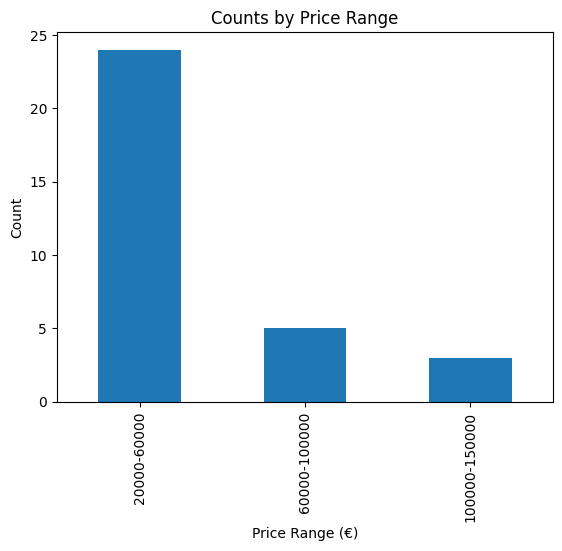

In [104]:
Brands['PriceRange'].value_counts().plot(kind='bar')
pp.xlabel('Price Range (€)')
pp.ylabel('Count')
pp.title('Counts by Price Range')
pp.show()

In [105]:
round(Brands[Brands['PriceRange'] == '20000-60000'].agg(['count','mean', 'std']),2)

Brand  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
count   24.0               24.00              24.0       24.00   
mean     NaN                8.31             157.1      286.79   
std      NaN                1.57              17.6       71.46   

       Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)  PriceRange  
count               24.00               24.00  24.00      24.00        24.0  
mean               178.58              343.03   4.76   38869.52         NaN  
std                 17.23              113.57   0.42    9994.14         NaN

In [106]:
round(Brands[Brands['PriceRange'] == '60000-100000'].agg(['count','mean', 'std']),2)

Brand  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
count    5.0                5.00              5.00        5.00   
mean     NaN                5.21            199.56      389.49   
std      NaN                0.98             27.78       62.91   

       Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)  PriceRange  
count                5.00                5.00   5.00       5.00         5.0  
mean               215.59              499.56   5.27   71671.80         NaN  
std                 14.27              154.99   0.42    9907.86         NaN

In [107]:
round(Brands[Brands['PriceRange'] == '100000-150000'].agg(['count','mean', 'std']),2)

Brand  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
count    3.0                3.00              3.00        3.00   
mean     NaN                5.43            218.00      524.33   
std      NaN                3.97             58.92      119.36   

       Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)  PriceRange  
count                3.00                3.00   3.00       3.00         3.0  
mean               164.47              652.00   4.67  130755.27         NaN  
std                 54.39              130.97   0.58   22941.36         NaN

In [108]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the price range bins
price_range = [20000, 60000, 100000, 150000]
pricerange = ['20000-60000', '60000-100000', '100000-150000']

# Categorize 'price' into the specified bins
Brands['PriceRange'] = pd.cut(Brands['Price (€)'], bins=price_range, labels=pricerange)
# Separate the data into three groups based on price range
pricerange1 = Brands[Brands['PriceRange'] == '20000-60000']['Price (€)']
pricerange2 = Brands[Brands['PriceRange'] == '60000-100000']['Price (€)']
pricerange3 = Brands[Brands['PriceRange'] == '100000-150000']['Price (€)']

# Perform t-test between the three groups
t_statistic, p_value = ttest_ind(pricerange1, pricerange2)
freedeg1 = (len(pricerange1)+len(pricerange2))-2
print(f'T-test between Group 1 and Group 2:\nT-statistic: {round(t_statistic,2)}, P-value: {p_value}, Degree of freedom2:{freedeg1}')

t_statistic, p_value = ttest_ind(pricerange1, pricerange3)
freedeg2 = (len(pricerange1)+len(pricerange3))-2
print(f'T-test between Group 1 and Group 3:\nT-statistic: {round(t_statistic,2)}, P-value: {p_value}, Degree of freedom2:{freedeg2}')

t_statistic, p_value = ttest_ind(pricerange2, pricerange3)
freedeg3 = (len(pricerange2)+len(pricerange3))-2
print(f'T-test between Group 2 and Group 3:\nT-statistic: {round(t_statistic,2)}, P-value: {round(p_value,3)}, Degree of freedom:{freedeg3}')

T-test between Group 1 and Group 2:
T-statistic: -6.69, P-value: 3.5559496141123346e-07, Degree of freedom2:27
T-test between Group 1 and Group 3:
T-statistic: -12.96, P-value: 1.3505061057994037e-12, Degree of freedom2:25
T-test between Group 2 and Group 3:
T-statistic: -5.21, P-value: 0.002, Degree of freedom:6


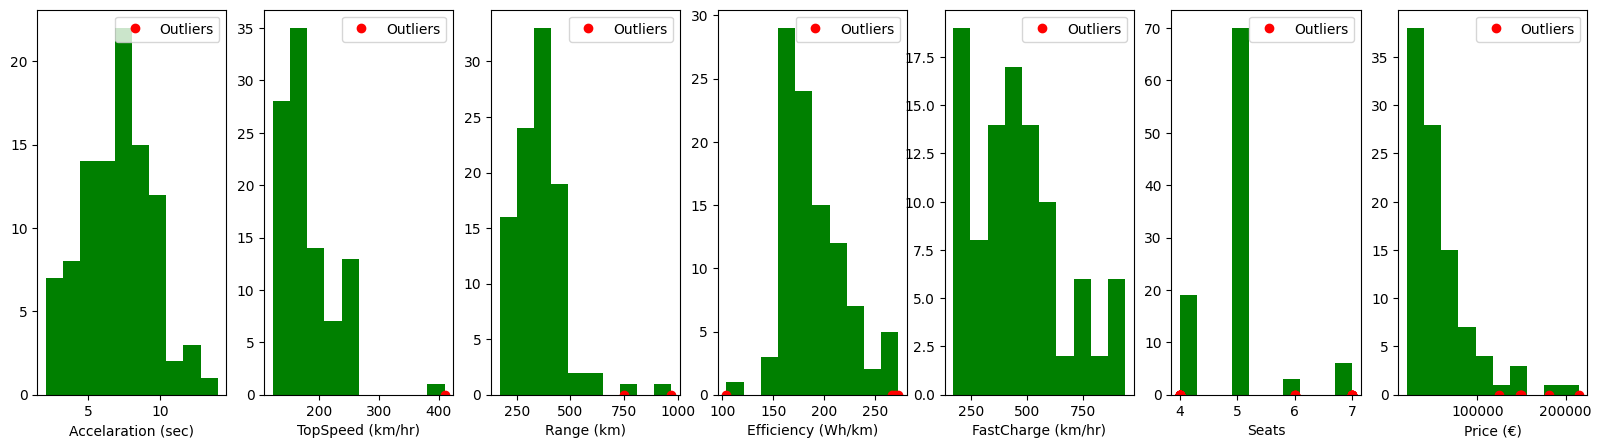

In [109]:
# Define the variables to plot
variables = ['Accelaration (sec)','TopSpeed (km/hr)','Range (km)',
             'Efficiency (Wh/km)','FastCharge (km/hr)','Seats','Price (€)']
fig, axs = pp.subplots(nrows=1, ncols=len(variables), figsize=(20, 5))

for i, variable in enumerate(variables):
    # Get the data for this variable
    data = ecars[variable]
    
    axs[i].hist(data, bins=10, color='green')
    
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    axs[i].plot(outliers, [0] * len(outliers), 'ro', label='Outliers')
    
    axs[i].set_xlabel(variable)
    axs[i].legend()

# Show the plot
pp.show()

In [110]:
BodyStyle_columns = Bodystyle.select_dtypes(include = ['float64','int64','int32']).columns.tolist()
BodyStyle_columns

['Accelaration (sec)',
 'TopSpeed (km/hr)',
 'Range (km)',
 'Efficiency (Wh/km)',
 'FastCharge (km/hr)',
 'Seats',
 'Price (€)']

In [111]:
BodyStyle_df = Bodystyle[BodyStyle_columns]
BodyStyle_df 

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0                5.55            280.00      610.00              187.00   
1                8.51            154.17      285.17              173.07   
2                6.14            207.20      449.00              162.00   
3                7.30            150.00      335.00              173.00   
4                5.00            193.33      533.33              261.33   
5               12.00            131.50      260.00              236.50   
6                6.98            179.18      344.56              197.58   
7                3.79            242.90      423.50              186.60   
8                3.50            250.00      385.00              217.00   

   FastCharge (km/hr)  Seats  Price (€)  
0              625.00   4.00  126450.00  
1              339.31   4.62   36150.83  
2              496.00   5.00   83375.80  
3              210.00   5.00   41906.00  
4              720.00   6.00   58333.33  
5              240.00   7.00   51938.50  
6              438.67   5.18   53982.53  
7              783.00   4.50   99966.90  
8              770.00   4.00  150000.00

In [112]:
scaler = MinMaxScaler()
norm_BodyStyle_df = pd.DataFrame(scaler.fit_transform(BodyStyle_df), columns = BodyStyle_columns)
round(norm_BodyStyle_df,2)

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0                0.24              1.00        1.00                0.25   
1                0.59              0.15        0.07                0.11   
2                0.31              0.51        0.54                0.00   
3                0.45              0.12        0.21                0.11   
4                0.18              0.42        0.78                1.00   
5                1.00              0.00        0.00                0.75   
6                0.41              0.32        0.24                0.36   
7                0.03              0.75        0.47                0.25   
8                0.00              0.80        0.36                0.55   

   FastCharge (km/hr)  Seats  Price (€)  
0                0.72   0.00       0.79  
1                0.23   0.21       0.00  
2                0.50   0.33       0.41  
3                0.00   0.33       0.05  
4                0.89   0.67       0.19  
5                0.05   1.00       0.14  
6                0.40   0.39       0.16  
7                1.00   0.17       0.56  
8                0.98   0.00       1.00

In [113]:
Bodystyle_col = Bodystyle.select_dtypes(include=['object'])
bodystyle = pd.concat([Bodystyle_col,norm_BodyStyle_df],axis = 1)
bodystyle

BodyStyle  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
0     Cabrio            0.241176          1.000000    1.000000   
1  Hatchback            0.589412          0.152660    0.071914   
2   Liftback            0.310588          0.509764    0.540000   
3        MPV            0.447059          0.124579    0.214286   
4     Pickup            0.176471          0.416364    0.780943   
5        SPV            1.000000          0.000000    0.000000   
6        SUV            0.409412          0.321077    0.241600   
7      Sedan            0.034118          0.750168    0.467143   
8    Station            0.000000          0.797980    0.357143   

   Efficiency (Wh/km)  FastCharge (km/hr)     Seats  Price (€)  
0            0.251686            0.724258  0.000000   0.793147  
1            0.111447            0.225672  0.206667   0.000000  
2            0.000000            0.499127  0.333333   0.414803  
3            0.110742            0.000000  0.333333   0.050551  
4            1.000000            0.890052  0.666667   0.194841  
5            0.750025            0.052356  1.000000   0.138672  
6            0.358200            0.399075  0.393333   0.156626  
7            0.247659            1.000000  0.166667   0.560532  
8            0.553710            0.977312  0.000000   1.000000

In [114]:
bodystyle.set_index('BodyStyle',inplace = True)
round(bodystyle,2)

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
BodyStyle                                                     
Cabrio                   0.24              1.00        1.00   
Hatchback                0.59              0.15        0.07   
Liftback                 0.31              0.51        0.54   
MPV                      0.45              0.12        0.21   
Pickup                   0.18              0.42        0.78   
SPV                      1.00              0.00        0.00   
SUV                      0.41              0.32        0.24   
Sedan                    0.03              0.75        0.47   
Station                  0.00              0.80        0.36   

           Efficiency (Wh/km)  FastCharge (km/hr)  Seats  Price (€)  
BodyStyle                                                            
Cabrio                   0.25                0.72   0.00       0.79  
Hatchback                0.11                0.23   0.21       0.00  
Liftback                 0.00                0.50   0.33       0.41  
MPV                      0.11                0.00   0.33       0.05  
Pickup                   1.00                0.89   0.67       0.19  
SPV                      0.75                0.05   1.00       0.14  
SUV                      0.36                0.40   0.39       0.16  
Sedan                    0.25                1.00   0.17       0.56  
Station                  0.55                0.98   0.00       1.00

<function matplotlib.pyplot.show(close=None, block=None)>

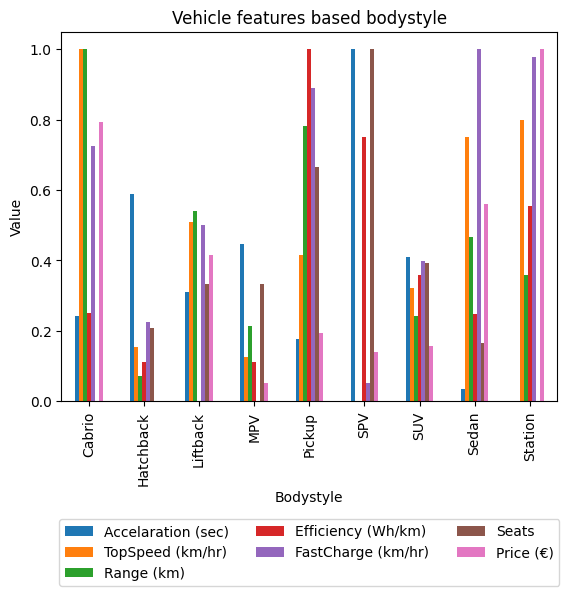

In [115]:
bodystyle.plot(kind = 'bar')
pp.xlabel('Bodystyle')
pp.ylabel('Value')
pp.title('Vehicle features based bodystyle')
pp.legend().set_visible(False)
pp.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)
pp.show

In [116]:
powertrain = round(ecars.groupby('PowerTrain',as_index = False)
                  [['Accelaration (sec)','TopSpeed (km/hr)','Range (km)',
                    'Efficiency (Wh/km)','FastCharge (km/hr)','Price (€)']].mean(),2)
powertrain

PowerTrain  Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
0    All Wheel Drive                4.89            216.90      426.46   
1  Front Wheel Drive                9.18            149.28      271.25   
2   Rear Wheel Drive                7.61            168.33      336.43   

   Efficiency (Wh/km)  FastCharge (km/hr)  Price (€)  
0              206.76              605.85   83840.10  
1              175.06              293.06   35322.81  
2              182.29              446.19   43274.00

In [118]:
norm_bs_matrix = bodystyle.corr()
norm_bs_matrix 

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
Accelaration (sec)            1.000000         -0.804349   -0.631920   
TopSpeed (km/hr)             -0.804349          1.000000    0.770749   
Range (km)                   -0.631920          0.770749    1.000000   
Efficiency (Wh/km)            0.063096         -0.099186    0.096419   
FastCharge (km/hr)           -0.867195          0.833574    0.660030   
Seats                         0.700451         -0.719967   -0.363198   
Price (€)                    -0.672570          0.902155    0.529806   

                    Efficiency (Wh/km)  FastCharge (km/hr)     Seats  \
Accelaration (sec)            0.063096           -0.867195  0.700451   
TopSpeed (km/hr)             -0.099186            0.833574 -0.719967   
Range (km)                    0.096419            0.660030 -0.363198   
Efficiency (Wh/km)            1.000000            0.268548  0.581090   
FastCharge (km/hr)            0.268548            1.000000 -0.460902   
Seats                         0.581090           -0.460902  1.000000   
Price (€)                     0.009330            0.742812 -0.623466   

                    Price (€)  
Accelaration (sec)  -0.672570  
TopSpeed (km/hr)     0.902155  
Range (km)           0.529806  
Efficiency (Wh/km)   0.009330  
FastCharge (km/hr)   0.742812  
Seats               -0.623466  
Price (€)            1.000000

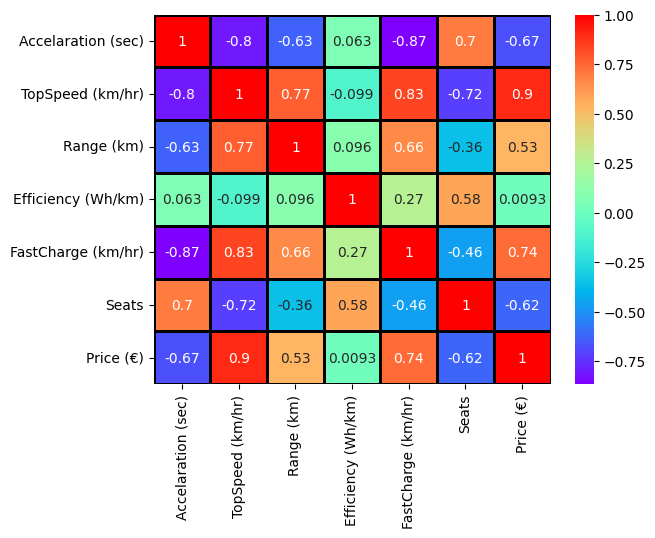

In [119]:
sns.heatmap(norm_bs_matrix,annot=True,cmap='rainbow',linewidths=0.8,linecolor='black')
pp.show()

In [121]:
cols_ecars = ['Accelaration (sec)','TopSpeed (km/hr)','Range (km)','Efficiency (Wh/km)','FastCharge (km/hr)','Seats','Price (€)']
cols_ecars

['Accelaration (sec)',
 'TopSpeed (km/hr)',
 'Range (km)',
 'Efficiency (Wh/km)',
 'FastCharge (km/hr)',
 'Seats',
 'Price (€)']

In [122]:
nums_ecars = ecars[cols_ecars]
nums_ecars

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0                   4.6             233.0       450.0               161.0   
1                  10.0             160.0       270.0               167.0   
2                   4.7             210.0       400.0               181.0   
3                   6.8             180.0       360.0               206.0   
4                   9.5             145.0       170.0               168.0   
..                  ...               ...         ...                 ...   
98                  7.5             160.0       330.0               191.0   
99                  4.5             210.0       335.0               258.0   
100                 5.9             200.0       325.0               194.0   
101                 5.1             200.0       375.0               232.0   
102                 7.5             190.0       400.0               238.0   

     FastCharge (km/hr)  Seats  Price (€)  
0                 940.0      5      55480  
1                 250.0      5      30000  
2                 620.0      5      56440  
3                 560.0      5      68040  
4                 190.0      4      32997  
..                  ...    ...        ...  
98                440.0      5      45000  
99                540.0      5      96050  
100               440.0      5      50000  
101               450.0      5      65000  
102               480.0      5      62000  

[98 rows x 7 columns]

In [123]:
scaler = MinMaxScaler()
norm_ecars = pd.DataFrame(scaler.fit_transform(nums_ecars),columns = cols_ecars)
norm_ecars

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0             0.210084          0.383275     0.35000            0.337278   
1             0.663866          0.128920     0.12500            0.372781   
2             0.218487          0.303136     0.28750            0.455621   
3             0.394958          0.198606     0.23750            0.603550   
4             0.621849          0.076655     0.00000            0.378698   
..                 ...               ...         ...                 ...   
93            0.453782          0.128920     0.20000            0.514793   
94            0.201681          0.303136     0.20625            0.911243   
95            0.319328          0.268293     0.19375            0.532544   
96            0.252101          0.268293     0.25625            0.757396   
97            0.453782          0.233449     0.28750            0.792899   

    FastCharge (km/hr)     Seats  Price (€)  
0             1.000000  0.333333   0.181407  
1             0.103896  0.333333   0.050654  
2             0.584416  0.333333   0.186334  
3             0.506494  0.333333   0.245860  
4             0.025974  0.000000   0.066033  
..                 ...       ...        ...  
93            0.350649  0.333333   0.127628  
94            0.480519  0.333333   0.389596  
95            0.350649  0.333333   0.153286  
96            0.363636  0.333333   0.230260  
97            0.402597  0.333333   0.214865  

[98 rows x 7 columns]

In [125]:
ecars['BrandModel'] = ecars['Brand'].str.cat(ecars['Model'],sep = ' ')
merged = pd.merge(ecars[['BrandModel','PowerTrain']], 
norm_ecars, left_index=True, right_index=True)
merged['BrandModel_PowerTrain'] = merged['BrandModel'].str.cat(ecars['PowerTrain'],sep=': ')
merged

BrandModel         PowerTrain  \
0   Tesla  Model 3 Long Range Dual Motor    All Wheel Drive   
1                  Volkswagen  ID.3 Pure   Rear Wheel Drive   
2                            Polestar  2    All Wheel Drive   
3                              BMW  iX3    Rear Wheel Drive   
4                              Honda  e    Rear Wheel Drive   
..                                   ...                ...   
93           Nissan  Ariya e-4ORCE 87kWh    All Wheel Drive   
94                Fiat  500e Convertible  Front Wheel Drive   
95      Volkswagen  ID.3 Pro Performance   Rear Wheel Drive   
96                    Kia  e-Soul 39 kWh  Front Wheel Drive   
97              Byton  M-Byte 72 kWh 2WD   Rear Wheel Drive   

    Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0             0.210084          0.383275     0.35000            0.337278   
1             0.663866          0.128920     0.12500            0.372781   
2             0.218487          0.303136     0.28750            0.455621   
3             0.394958          0.198606     0.23750            0.603550   
4             0.621849          0.076655     0.00000            0.378698   
..                 ...               ...         ...                 ...   
93            0.453782          0.128920     0.20000            0.514793   
94            0.201681          0.303136     0.20625            0.911243   
95            0.319328          0.268293     0.19375            0.532544   
96            0.252101          0.268293     0.25625            0.757396   
97            0.453782          0.233449     0.28750            0.792899   

    FastCharge (km/hr)     Seats  Price (€)  \
0             1.000000  0.333333   0.181407   
1             0.103896  0.333333   0.050654   
2             0.584416  0.333333   0.186334   
3             0.506494  0.333333   0.245860   
4             0.025974  0.000000   0.066033   
..                 ...       ...        ...   
93            0.350649  0.333333   0.127628   
94            0.480519  0.333333   0.389596   
95            0.350649  0.333333   0.153286   
96            0.363636  0.333333   0.230260   
97            0.402597  0.333333   0.214865   

                                BrandModel_PowerTrain  
0   Tesla  Model 3 Long Range Dual Motor: All Whee...  
1             Volkswagen  ID.3 Pure: Rear Wheel Drive  
2                        Polestar  2: All Wheel Drive  
3                         BMW  iX3 : Rear Wheel Drive  
4                         Honda  e : Rear Wheel Drive  
..                                                ...  
93       Nissan  Ariya e-4ORCE 87kWh: All Wheel Drive  
94          Fiat  500e Convertible: Front Wheel Drive  
95  Volkswagen  ID.3 Pro Performance: Rear Wheel D...  
96              Kia  e-Soul 39 kWh: Front Wheel Drive  
97         Byton  M-Byte 72 kWh 2WD: Rear Wheel Drive  

[93 rows x 10 columns]

In [126]:
merged = pd.merge(ecars[['BrandModel','PowerTrain']], 
norm_ecars, left_index=True, right_index=True)
merged 

BrandModel         PowerTrain  \
0   Tesla  Model 3 Long Range Dual Motor    All Wheel Drive   
1                  Volkswagen  ID.3 Pure   Rear Wheel Drive   
2                            Polestar  2    All Wheel Drive   
3                              BMW  iX3    Rear Wheel Drive   
4                              Honda  e    Rear Wheel Drive   
..                                   ...                ...   
93           Nissan  Ariya e-4ORCE 87kWh    All Wheel Drive   
94                Fiat  500e Convertible  Front Wheel Drive   
95      Volkswagen  ID.3 Pro Performance   Rear Wheel Drive   
96                    Kia  e-Soul 39 kWh  Front Wheel Drive   
97              Byton  M-Byte 72 kWh 2WD   Rear Wheel Drive   

    Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0             0.210084          0.383275     0.35000            0.337278   
1             0.663866          0.128920     0.12500            0.372781   
2             0.218487          0.303136     0.28750            0.455621   
3             0.394958          0.198606     0.23750            0.603550   
4             0.621849          0.076655     0.00000            0.378698   
..                 ...               ...         ...                 ...   
93            0.453782          0.128920     0.20000            0.514793   
94            0.201681          0.303136     0.20625            0.911243   
95            0.319328          0.268293     0.19375            0.532544   
96            0.252101          0.268293     0.25625            0.757396   
97            0.453782          0.233449     0.28750            0.792899   

    FastCharge (km/hr)     Seats  Price (€)  
0             1.000000  0.333333   0.181407  
1             0.103896  0.333333   0.050654  
2             0.584416  0.333333   0.186334  
3             0.506494  0.333333   0.245860  
4             0.025974  0.000000   0.066033  
..                 ...       ...        ...  
93            0.350649  0.333333   0.127628  
94            0.480519  0.333333   0.389596  
95            0.350649  0.333333   0.153286  
96            0.363636  0.333333   0.230260  
97            0.402597  0.333333   0.214865  

[93 rows x 9 columns]

In [127]:
corrmatrix = norm_ecars.corr()
corrmatrix

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  \
Accelaration (sec)            1.000000         -0.844706   -0.656763   
TopSpeed (km/hr)             -0.844706          1.000000    0.729297   
Range (km)                   -0.656763          0.729297    1.000000   
Efficiency (Wh/km)           -0.439087          0.343488    0.296230   
FastCharge (km/hr)           -0.768397          0.769719    0.698120   
Seats                        -0.046564          0.023792    0.154212   
Price (€)                    -0.683177          0.822229    0.662957   

                    Efficiency (Wh/km)  FastCharge (km/hr)     Seats  \
Accelaration (sec)           -0.439087           -0.768397 -0.046564   
TopSpeed (km/hr)              0.343488            0.769719  0.023792   
Range (km)                    0.296230            0.698120  0.154212   
Efficiency (Wh/km)            1.000000            0.307342  0.290138   
FastCharge (km/hr)            0.307342            1.000000  0.096641   
Seats                         0.290138            0.096641  1.000000   
Price (€)                     0.384342            0.651613 -0.086514   

                    Price (€)  
Accelaration (sec)  -0.683177  
TopSpeed (km/hr)     0.822229  
Range (km)           0.662957  
Efficiency (Wh/km)   0.384342  
FastCharge (km/hr)   0.651613  
Seats               -0.086514  
Price (€)            1.000000

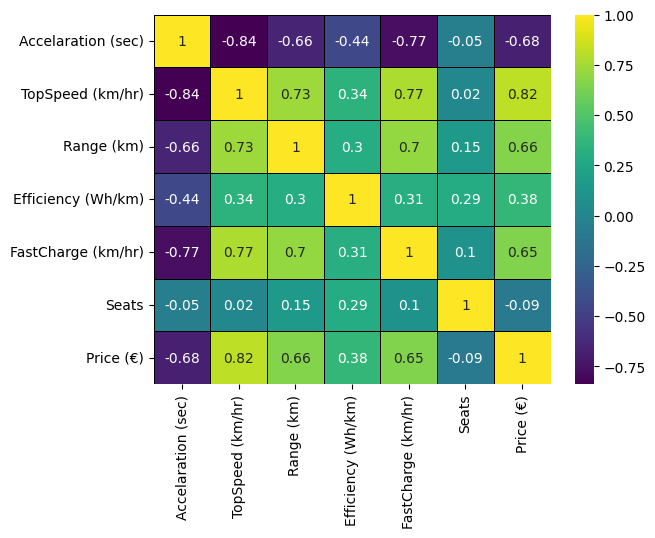

In [128]:
sns.heatmap(round(corrmatrix,2),annot=True,cmap='viridis',linewidths=0.7,linecolor='black')
pp.show()

In [129]:
# Define the criteria
Range_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Acceleration_criteria = [(0.1,0.25,4),(0.26,0.50,3),(0.51,0.75,2),(0.76,1.0,1)]
TopSpeed_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Price_criteria = [(0.1,0.25,4),(0.26,0.50,3),(0.51,0.75,2),(0.76,1.0,1)]
FastCharge_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Efficiency_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]
Seats_criteria = [(0.76,1.0,4),(0.51,0.75,3),(0.26,0.50,2),(0.1,0.25,1)]

# Define a function to calculate the score for a given value and criteria
def get_score(value, criteria):
    for c in criteria:
        if value >= c[0] and value <= c[1]:
            return c[2]
    return 0

# Compute the score for each record in the DataFrame
scores = []
for i, row in norm_ecars.iterrows():
    Range_score = get_score(row["Range (km)"], Range_criteria)
    Price_score = get_score(row["Price (€)"], Price_criteria)
    FastCharge_score = get_score(row["FastCharge (km/hr)"], FastCharge_criteria)
    Acceleration_score = get_score(row["Accelaration (sec)"], Acceleration_criteria)
    TopSpeed_score = get_score(row["TopSpeed (km/hr)"], TopSpeed_criteria)
    Efficiency_score = get_score(row["Efficiency (Wh/km)"], Efficiency_criteria)
    Seats_score = get_score(row["Seats"], Seats_criteria)
    total_score = Range_score + Acceleration_score + TopSpeed_score + Price_score + FastCharge_score + Efficiency_score + Seats_score
    scores.append(total_score)

norm_ecars["Score"] = scores
norm_ecars

Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0             0.210084          0.383275     0.35000            0.337278   
1             0.663866          0.128920     0.12500            0.372781   
2             0.218487          0.303136     0.28750            0.455621   
3             0.394958          0.198606     0.23750            0.603550   
4             0.621849          0.076655     0.00000            0.378698   
..                 ...               ...         ...                 ...   
93            0.453782          0.128920     0.20000            0.514793   
94            0.201681          0.303136     0.20625            0.911243   
95            0.319328          0.268293     0.19375            0.532544   
96            0.252101          0.268293     0.25625            0.757396   
97            0.453782          0.233449     0.28750            0.792899   

    FastCharge (km/hr)     Seats  Price (€)  Score  
0             1.000000  0.333333   0.181407     20  
1             0.103896  0.333333   0.050654      9  
2             0.584416  0.333333   0.186334     19  
3             0.506494  0.333333   0.245860     14  
4             0.025974  0.000000   0.066033      4  
..                 ...       ...        ...    ...  
93            0.350649  0.333333   0.127628     16  
94            0.480519  0.333333   0.389596     18  
95            0.350649  0.333333   0.153286     17  
96            0.363636  0.333333   0.230260     10  
97            0.402597  0.333333   0.214865     18  

[98 rows x 8 columns]

In [130]:
# Import Python modules for random forest for the training and testing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as pp

# separate target variable and input features
X = norm_ecars[['Price (€)','Range (km)','Accelaration (sec)','Seats', 'Efficiency (Wh/km)','TopSpeed (km/hr)','FastCharge (km/hr)']]
y = norm_ecars['Score']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# train Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=123)
rf_model.fit(X_train, y_train)

# evaluate model on testing set
y_pred = rf_model.predict(X_test)
r2_score = round(rf_model.score(X_test, y_test),2)
mae = round(mean_absolute_error(y_test, y_pred),2)
mse = round(mean_squared_error(y_test, y_pred),2)

# print performance metrics
print("R-squared score:", r2_score)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R-squared score: 0.9
Mean Absolute Error (MAE): 1.28
Mean Squared Error (MSE): 2.91


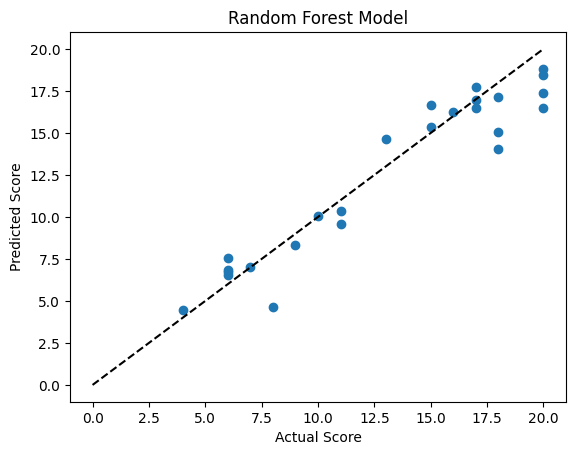

In [131]:
pp.scatter(y_test, y_pred)
pp.plot([0, 20], [0, 20], '--k')
pp.xlabel('Actual Score')
pp.ylabel('Predicted Score')
pp.title('Random Forest Model')
pp.show()

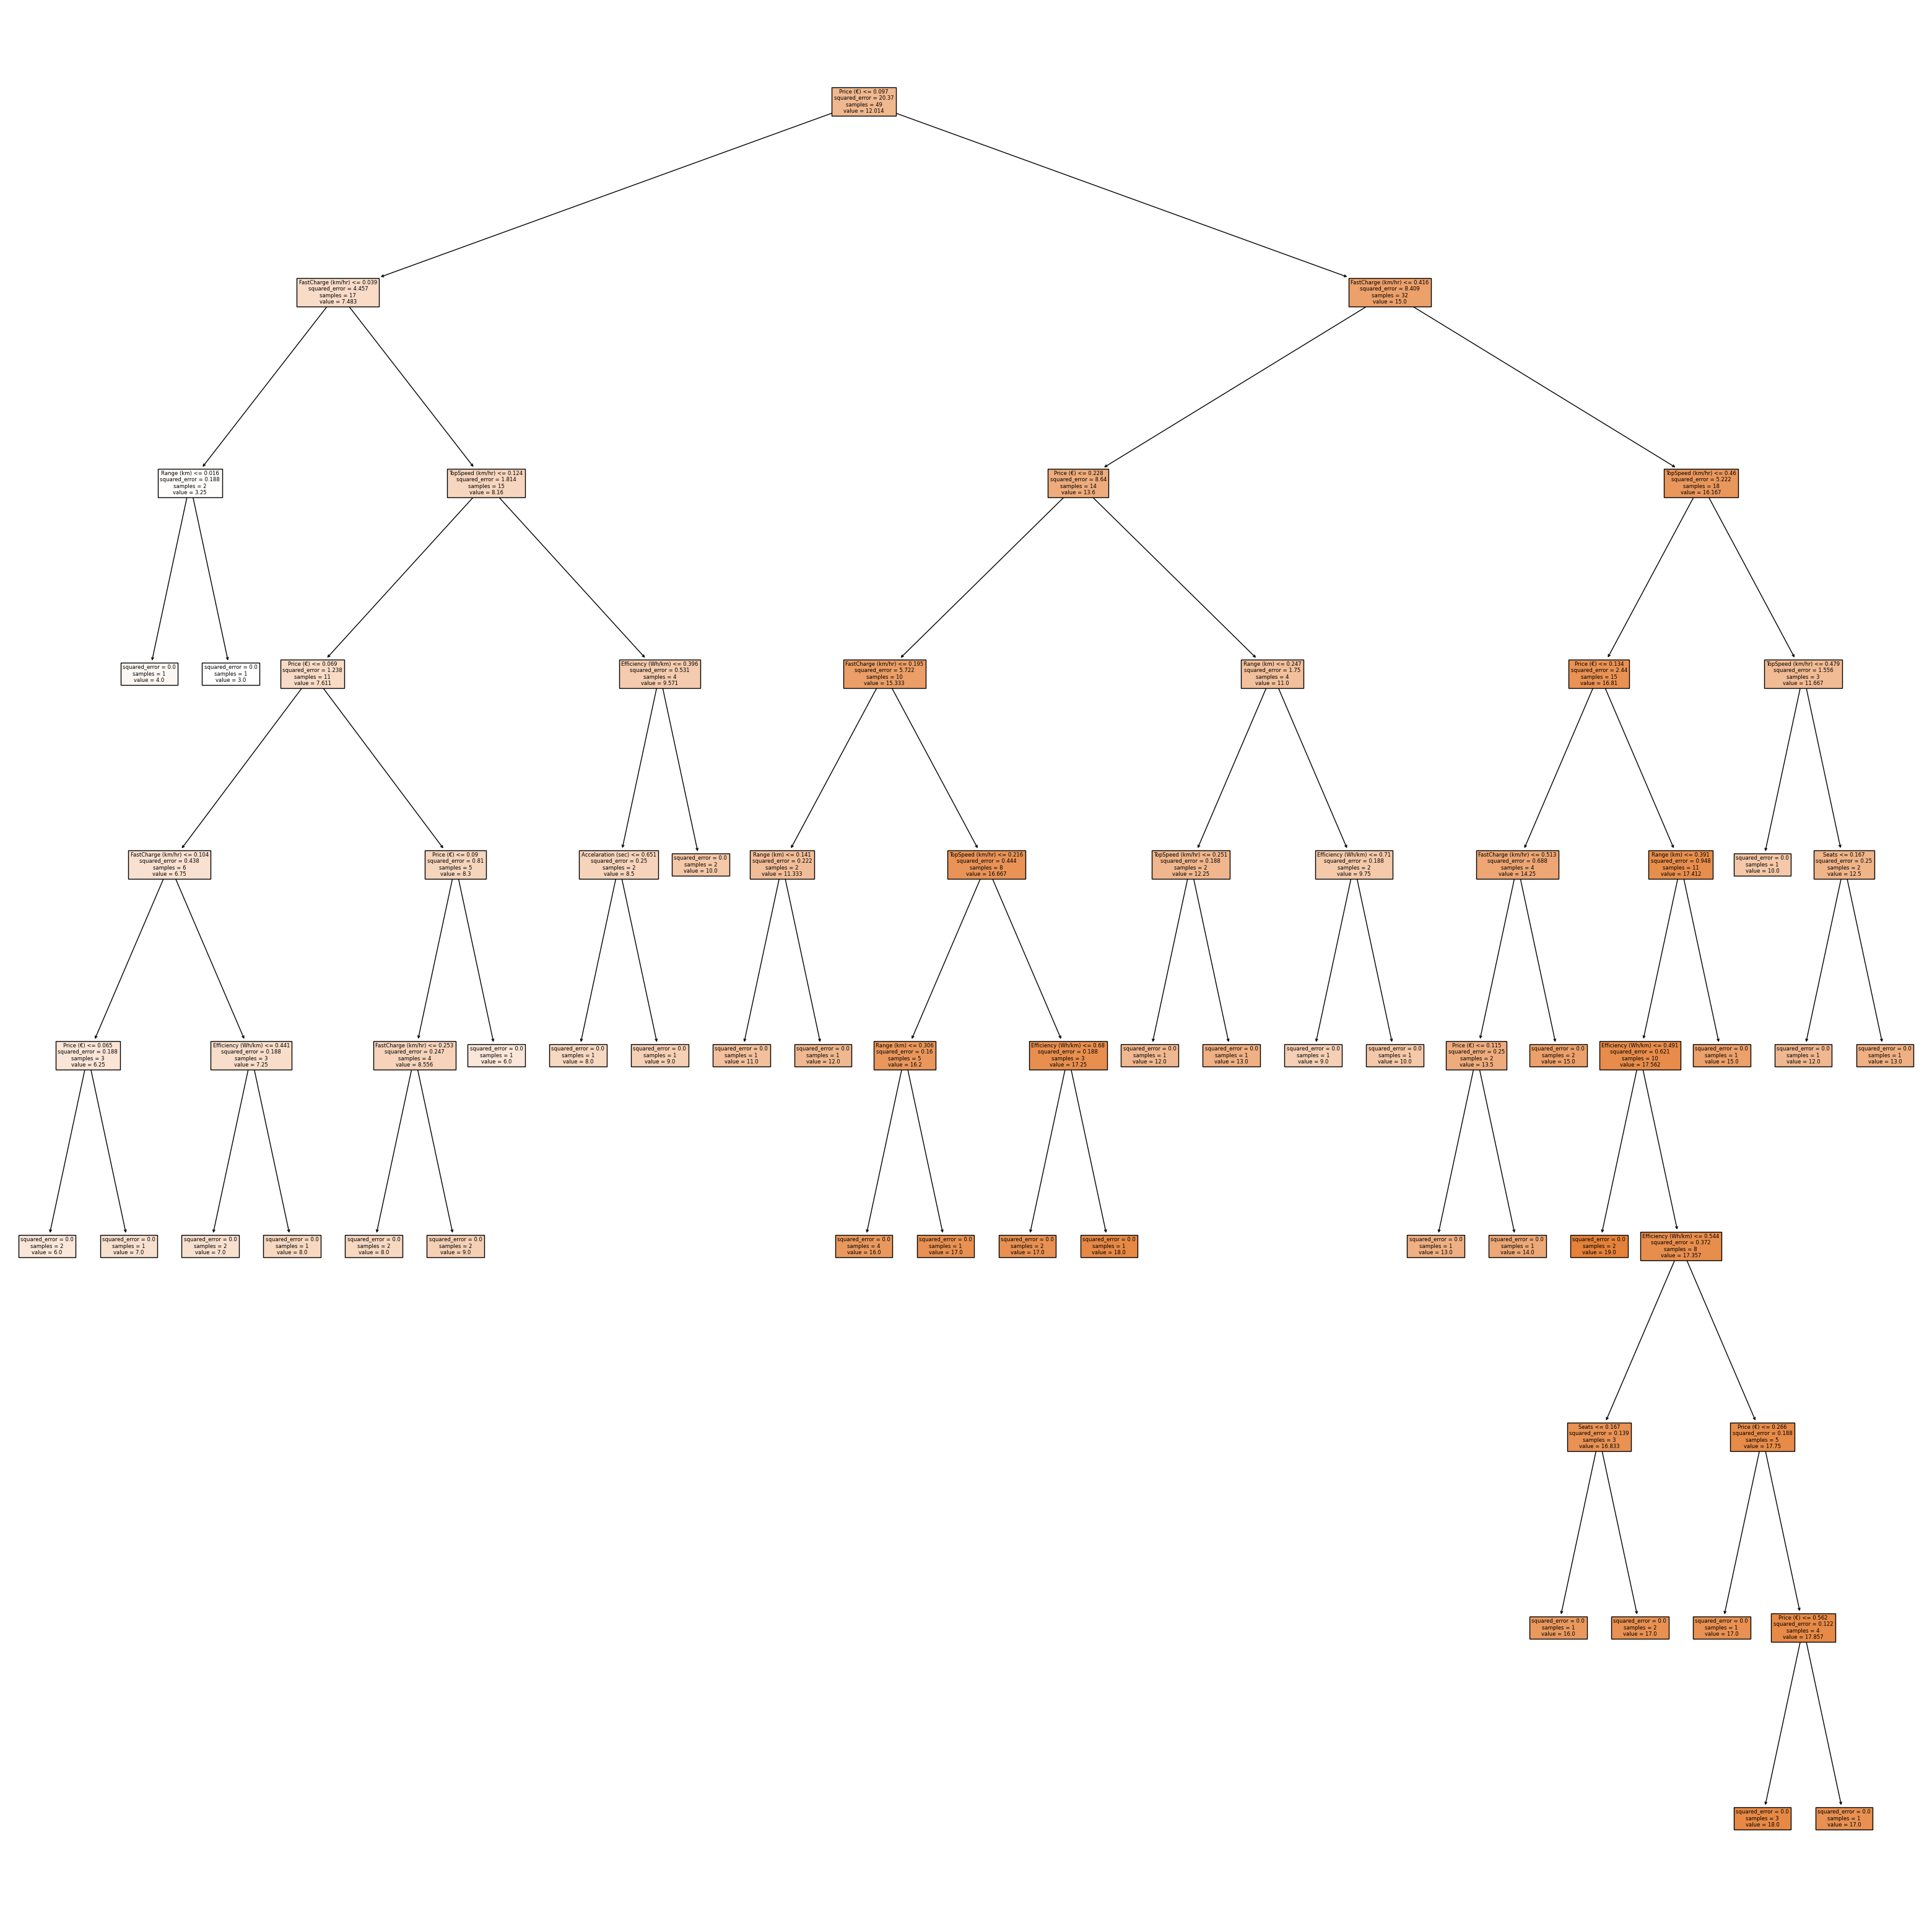

In [132]:
from sklearn.tree import plot_tree
pp.figure(figsize=(40, 40))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True)
pp.show()

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Load data and split into features and target variable
X = norm_ecars[['Price (€)','Range (km)','Accelaration (sec)','Seats', 'Efficiency (Wh/km)','TopSpeed (km/hr)','FastCharge (km/hr)']]
y = norm_ecars['Score']

# Create random forest model with hyperparameters
rf = RandomForestRegressor(n_estimators=1000,max_depth=100)

# Perform cross-validation with 5 folds
scores = cross_val_score(rf, X, y, cv=4)

# Print the average score and standard deviation
print("Cross-validation scores: {}".format(scores))
print("Average score: {}".format(np.mean(scores)))
print("Standard deviation: {}".format(np.std(scores)))

Cross-validation scores: [0.79758843 0.79764781 0.80676446 0.80649496]
Average score: 0.8021239163196299
Standard deviation: 0.004506853382332309


In [135]:
merged['Score'] = norm_ecars['Score']
merged_sorted = merged.sort_values('Score', ascending=False,ignore_index=True)
merged_sorted

BrandModel         PowerTrain  \
0                  Renault  Zoe ZE40 R110  Front Wheel Drive   
1                 Nissan  e-NV200 Evalia   Front Wheel Drive   
2    Tesla  Model 3 Long Range Dual Motor    All Wheel Drive   
3               Tesla  Model X Long Range    All Wheel Drive   
4   Tesla  Model 3 Long Range Performance    All Wheel Drive   
..                                    ...                ...   
88                       Honda  e Advance   Rear Wheel Drive   
89                              Honda  e    Rear Wheel Drive   
90                    SEAT  Mii Electric   Front Wheel Drive   
91                     Skoda  CITIGOe iV   Front Wheel Drive   
92                     Volkswagen  e-Up!   Front Wheel Drive   

    Accelaration (sec)  TopSpeed (km/hr)  Range (km)  Efficiency (Wh/km)  \
0             0.134454          0.411150     0.30000            0.431953   
1             0.243697          0.233449     0.36250            0.928994   
2             0.210084          0.383275     0.35000            0.337278   
3             0.210084          0.442509     0.35000            0.633136   
4             0.109244          0.480836     0.33125            0.372781   
..                 ...               ...         ...                 ...   
88            0.521008          0.076655     0.00000            0.378698   
89            0.621849          0.076655     0.00000            0.378698   
90            0.857143          0.024390     0.03125            0.366864   
91            0.857143          0.024390     0.03125            0.366864   
92            0.823529          0.024390     0.03125            0.366864   

    FastCharge (km/hr)     Seats  Price (€)  Score  
0             0.948052  1.000000   0.233442     22  
1             0.701299  0.666667   0.178944     21  
2             1.000000  0.333333   0.181407     20  
3             0.415584  1.000000   0.337972     20  
4             0.961039  0.333333   0.212197     20  
..                 ...       ...        ...    ...  
88            0.025974  0.000000   0.081038      4  
89            0.025974  0.000000   0.066033      4  
90            0.000000  0.000000   0.000000      3  
91            0.000000  0.000000   0.022605      3  
92            0.000000  0.000000   0.006630      3  

[93 rows x 10 columns]

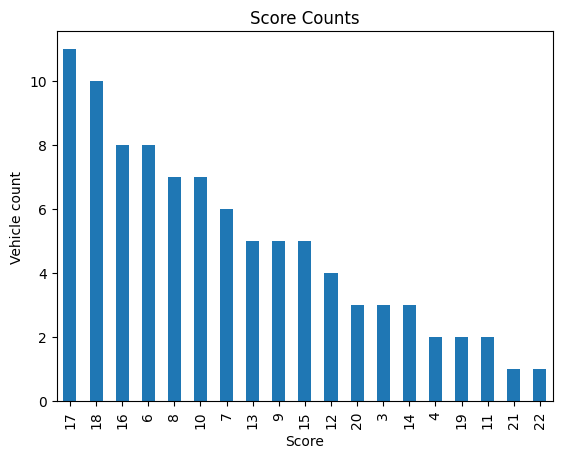

In [136]:
merged_sorted.value_counts('Score').plot(kind = 'bar')
pp.ylabel('Vehicle count')
pp.title('Score Counts')
pp.show()

In [137]:
round(merged['Score'].isin([17,18]).value_counts('Score'),2)

False    0.77
True     0.23
Name: Score, dtype: float64

In [138]:
# Extract only records that meet scores of 18 and 19
condition = merged['Score'].isin([17,18])
desired_cols =  ['BrandModel','PowerTrain','Price (€)','Range (km)','Accelaration (sec)','Seats',
                 'Efficiency (Wh/km)','TopSpeed (km/hr)','FastCharge (km/hr)','Score']
slct_flt = merged[condition][desired_cols]
slct_flt.sort_values('Score',ignore_index=True,inplace=True,ascending=False)
slct_flt

BrandModel         PowerTrain  Price (€)  \
0             Ford  Mustang Mach-E ER RWD   Rear Wheel Drive   0.457600   
1                 Audi  e-tron 55 quattro    All Wheel Drive   0.304386   
2                  Fiat  500e Convertible  Front Wheel Drive   0.389596   
3                     Skoda  Enyaq iV vRS    All Wheel Drive   0.191773   
4          Tesla  Cybertruck Single Motor   Rear Wheel Drive   0.378050   
5                     Skoda  Enyaq iV 80X    All Wheel Drive   0.225128   
6                Byton  M-Byte 72 kWh 2WD   Rear Wheel Drive   0.214865   
7       Audi  e-tron Sportback 55 quattro    All Wheel Drive   0.315645   
8             Tesla  Cybertruck Tri Motor    All Wheel Drive   0.281576   
9    Tesla  Model Y Long Range Dual Motor    All Wheel Drive   0.197520   
10  Tesla  Model Y Long Range Performance    All Wheel Drive   0.153286   
11                        Jaguar  I-Pace     All Wheel Drive   0.176250   
12                       Audi  Q4 e-tron     All Wheel Drive   0.178944   
13           Tesla  Cybertruck Dual Motor    All Wheel Drive   0.219484   
14            Ford  Mustang Mach-E ER AWD    All Wheel Drive   0.127628   
15                        BMW  i3s 120 Ah   Rear Wheel Drive   0.666446   
16                         Mercedes  EQA     All Wheel Drive   0.127628   
17                 Mercedes  EQV 300 Long  Front Wheel Drive   0.140457   
18                       Audi  e-tron GT     All Wheel Drive   0.538156   
19       Volkswagen  ID.3 Pro Performance   Rear Wheel Drive   0.153286   
20     Tesla  Model 3 Standard Range Plus   Rear Wheel Drive   0.134710   

    Range (km)  Accelaration (sec)     Seats  Efficiency (Wh/km)  \
0      0.31875            0.159664  0.000000            0.550296   
1      0.24375            0.302521  0.333333            0.786982   
2      0.20625            0.201681  0.333333            0.911243   
3      0.31250            0.302521  0.333333            0.609467   
4      0.18750            0.201681  0.333333            0.982249   
5      0.27500            0.285714  0.333333            0.828402   
6      0.28750            0.453782  0.333333            0.792899   
7      0.26250            0.302521  0.333333            0.733728   
8      0.72500            0.075630  0.666667            0.964497   
9      0.31875            0.252101  1.000000            0.396450   
10     0.33750            0.462185  0.333333            0.556213   
11     0.35000            0.411765  0.333333            0.568047   
12     0.28750            0.352941  0.333333            0.526627   
13     0.32500            0.327731  0.333333            0.621302   
14     0.28750            0.411765  0.333333            0.526627   
15     0.26875            0.117647  0.000000            0.668639   
16     0.22500            0.243697  0.333333            0.396450   
17     0.28750            0.344538  0.333333            0.526627   
18     0.31875            0.117647  0.000000            0.550296   
19     0.19375            0.319328  0.333333            0.532544   
20     0.17500            0.294118  0.333333            0.289941   

    TopSpeed (km/hr)  FastCharge (km/hr)  Score  
0           0.442509            0.935065     18  
1           0.268293            0.545455     18  
2           0.303136            0.480519     18  
3           0.268293            0.428571     18  
4           0.303136            0.441558     18  
5           0.233449            0.376623     18  
6           0.233449            0.402597     18  
7           0.268293            0.571429     18  
8           0.303136            0.701299     18  
9           0.327526            0.987013     18  
10          0.128920            0.454545     17  
11          0.198606            0.337662     17  
12          0.198606            0.480519     17  
13          0.198606            0.311688     17  
14          0.128920            0.480519     17  
15          0.442509            0.779221     17  
16          0.268293            0

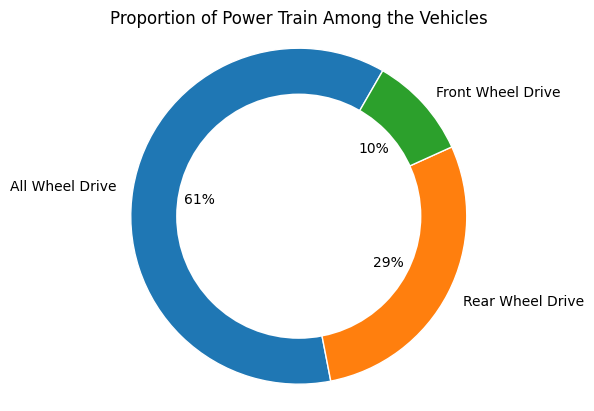

In [139]:
pwrtrans = round(slct_flt['PowerTrain'].value_counts('Score'),2)
data = pwrtrans  
pp.pie(data, labels=pwrtrans.index, autopct='%1.0f%%', startangle=60, wedgeprops={'edgecolor': 'white'})
centre_circle = pp.Circle((0,0),0.73,fc='white')
fig = pp.gcf()
fig.gca().add_artist(centre_circle)
pp.axis('equal')
pp.title('Proportion of Power Train Among the Vehicles')
pp.show()

In [154]:
slct_flt_17 = slct_flt[slct_flt['Score']==17]
slct_flt_17

Price (€)  Range (km)  Accelaration (sec)     Seats  Efficiency (Wh/km)  \
10   0.153286     0.33750            0.462185  0.333333            0.556213   
11   0.176250     0.35000            0.411765  0.333333            0.568047   
12   0.178944     0.28750            0.352941  0.333333            0.526627   
13   0.219484     0.32500            0.327731  0.333333            0.621302   
14   0.127628     0.28750            0.411765  0.333333            0.526627   
15   0.666446     0.26875            0.117647  0.000000            0.668639   
16   0.127628     0.22500            0.243697  0.333333            0.396450   
17   0.140457     0.28750            0.344538  0.333333            0.526627   
18   0.538156     0.31875            0.117647  0.000000            0.550296   
19   0.153286     0.19375            0.319328  0.333333            0.532544   
20   0.134710     0.17500            0.294118  0.333333            0.289941   

    TopSpeed (km/hr)  FastCharge (km/hr)  Score  \
10          0.128920            0.454545     17   
11          0.198606            0.337662     17   
12          0.198606            0.480519     17   
13          0.198606            0.311688     17   
14          0.128920            0.480519     17   
15          0.442509            0.779221     17   
16          0.268293            0.350649     17   
17          0.198606            0.480519     17   
18          0.407666            0.883117     17   
19          0.268293            0.350649     17   
20          0.355401            0.623377     17   

                                BrandModel_PowerTrain  
10  Tesla  Model Y Long Range Performance: All Whe...  
11                   Jaguar  I-Pace : All Wheel Drive  
12                  Audi  Q4 e-tron : All Wheel Drive  
13      Tesla  Cybertruck Dual Motor: All Wheel Drive  
14       Ford  Mustang Mach-E ER AWD: All Wheel Drive  
15                  BMW  i3s 120 Ah: Rear Wheel Drive  
16                    Mercedes  EQA : All Wheel Drive  
17          Mercedes  EQV 300 Long: Front Wheel Drive  
18                  Audi  e-tron GT : All Wheel Drive  
19  Volkswagen  ID.3 Pro Performance: Rear Wheel D...  
20  Tesla  Model 3 Standard Range Plus: Rear Wheel...

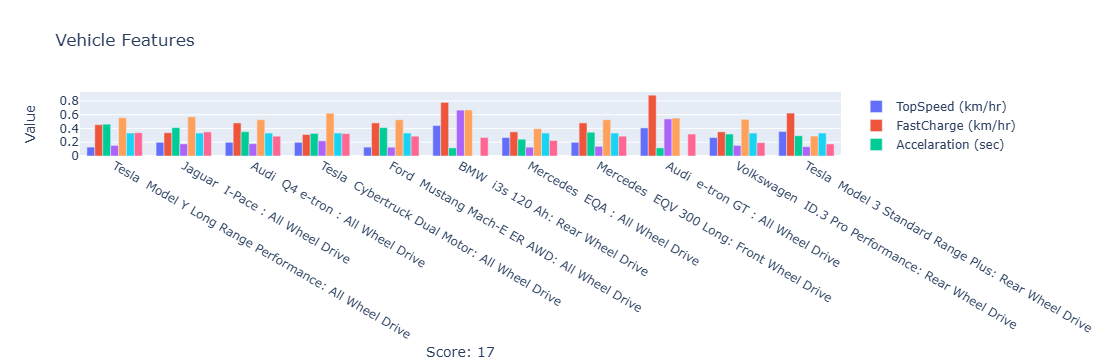

In [155]:
import plotly.graph_objs as go
# create traces for each bar
trace1 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["TopSpeed (km/hr)"], name='TopSpeed (km/hr)')
trace2 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["FastCharge (km/hr)"], name='FastCharge (km/hr)')
trace3 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Accelaration (sec)"], name='Accelaration (sec)')
trace4 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Price (€)"], name='Price (€)')
trace5 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Efficiency (Wh/km)"], name='Efficiency (Wh/km)')
trace6 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Seats"], name='Seats')
trace7 = go.Bar(x=slct_flt_17['BrandModel_PowerTrain'], y=slct_flt_17["Range (km)"], name='Range (km)')
# create layout
layout = go.Layout(title='Vehicle Features',
                   xaxis=dict(title='Score: 17'),
                   yaxis=dict(title='Value'))
# create figure
fig = go.Figure(data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7], layout=layout)
# show plot
fig.show()

In [156]:
slct_flt_18 = slct_flt[slct_flt['Score']==18]
slct_flt_18

Price (€)  Range (km)  Accelaration (sec)     Seats  Efficiency (Wh/km)  \
0   0.457600     0.31875            0.159664  0.000000            0.550296   
1   0.304386     0.24375            0.302521  0.333333            0.786982   
2   0.389596     0.20625            0.201681  0.333333            0.911243   
3   0.191773     0.31250            0.302521  0.333333            0.609467   
4   0.378050     0.18750            0.201681  0.333333            0.982249   
5   0.225128     0.27500            0.285714  0.333333            0.828402   
6   0.214865     0.28750            0.453782  0.333333            0.792899   
7   0.315645     0.26250            0.302521  0.333333            0.733728   
8   0.281576     0.72500            0.075630  0.666667            0.964497   
9   0.197520     0.31875            0.252101  1.000000            0.396450   

   TopSpeed (km/hr)  FastCharge (km/hr)  Score  \
0          0.442509            0.935065     18   
1          0.268293            0.545455     18   
2          0.303136            0.480519     18   
3          0.268293            0.428571     18   
4          0.303136            0.441558     18   
5          0.233449            0.376623     18   
6          0.233449            0.402597     18   
7          0.268293            0.571429     18   
8          0.303136            0.701299     18   
9          0.327526            0.987013     18   

                               BrandModel_PowerTrain  
0      Ford  Mustang Mach-E ER RWD: Rear Wheel Drive  
1           Audi  e-tron 55 quattro: All Wheel Drive  
2          Fiat  500e Convertible: Front Wheel Drive  
3               Skoda  Enyaq iV vRS: All Wheel Drive  
4   Tesla  Cybertruck Single Motor: Rear Wheel Drive  
5               Skoda  Enyaq iV 80X: All Wheel Drive  
6         Byton  M-Byte 72 kWh 2WD: Rear Wheel Drive  
7  Audi  e-tron Sportback 55 quattro: All Wheel D...  
8       Tesla  Cybertruck Tri Motor: All Wheel Drive  
9  Tesla  Model Y Long Range Dual Motor: All Whee...

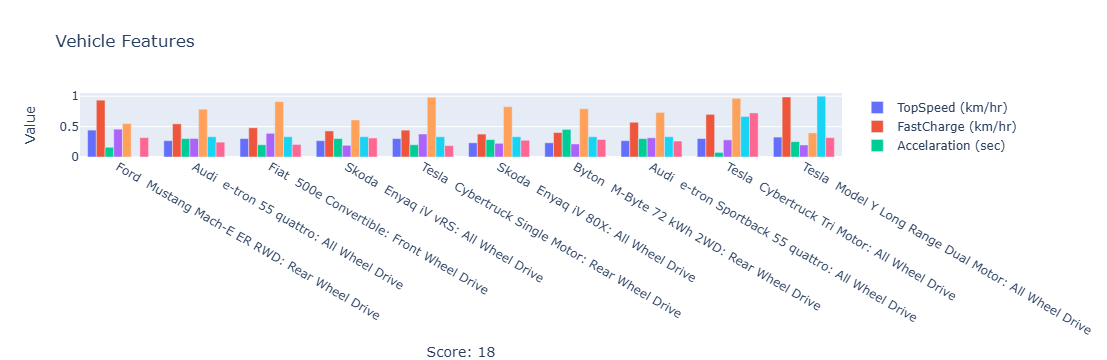

In [157]:
import plotly.graph_objs as go
# create traces for each bar
trace1 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["TopSpeed (km/hr)"], name='TopSpeed (km/hr)')
trace2 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["FastCharge (km/hr)"], name='FastCharge (km/hr)')
trace3 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Accelaration (sec)"], name='Accelaration (sec)')
trace4 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Price (€)"], name='Price (€)')
trace5 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Efficiency (Wh/km)"], name='Efficiency (Wh/km)')
trace6 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Seats"], name='Seats')
trace7 = go.Bar(x=slct_flt_18['BrandModel_PowerTrain'], y=slct_flt_18["Range (km)"], name='Range (km)')
# create layout
layout = go.Layout(title='Vehicle Features',
                   xaxis=dict(title='Score: 18'),
                   yaxis=dict(title='Value'))
# create figure
fig = go.Figure(data=[trace1,trace2,trace3,trace4,trace5,trace6,trace7], layout=layout)
# show plot
fig.show()